In [62]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [63]:
# datasets books,student,rating

books = pd.read_csv('books.csv', error_bad_lines=False, encoding="latin-1")
# columns of books dataset

books.columns = ['ISBN', 'bookTitle',
                 'bookAuthor', 'yearOfPublication', 'publisher']

print(books)

users = pd.read_csv('student.csv', error_bad_lines=False, encoding="latin-1")
# columns of student dataset

users.columns = ['userID', 'Name', 'Age', 'Interest']
print(users)

ratings = pd.read_csv('ratings.csv',
                      error_bad_lines=False, encoding="latin-1")
# columns of rating dataset

ratings.columns = ['userID', 'ISBN', 'bookRating']
print(ratings)


                ISBN                                 bookTitle  \
0     978-8120349391           Automotive Mechanics Srinivasan   
1     978-0198083542     Interrnal Conbustion Engines Ganeshan   
2     978-9351341741               Control Systems Anand Kumar   
3     978-9351343257               Digital Control Systems Kuo   
4     978-0198086109                Operations Research Hiller   
5     978-9385880506        Introdution To Game Theory Osborne   
6     978-0070146150     Advanced Engginering Mathematics Berg   
7     978-0198070887      Engineering Mathematic I & Ii Se Gup   
8     978-0198070887   Engineering Mathematics (Iii & Iv Sem )   
9     978-9339220921              Systems Program Ming Donovan   
10    978-0198094869            The 8051 Microcontroller Mazdi   
11    978-8173716126      Advanced Computer Architecture Hwang   
12    978-0070634244                           Vlsi Design Das   
13    978-9358920921   Fundamentals Of Computer Algorithms Hor   
14    978-

In [64]:
# shape of rating dataset,gives the dimension of dataset i.e the number of rows and columns

print(ratings.shape)
# list of rating columns

print(list(ratings.columns))

print(books.shape)
# list of books columns

print(list(books.columns))

print(users.shape)
# list of student columns

print(list(users.columns))


(85, 3)
['userID', 'ISBN', 'bookRating']
(502, 5)
['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher']
(69, 4)
['userID', 'Name', 'Age', 'Interest']


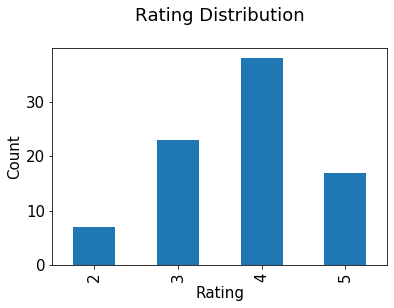

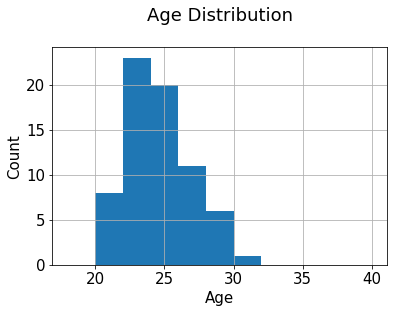

In [65]:
# rating distributution using histogram

plt.rc("font", size=15)
ratings.bookRating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png', bbox_inches='tight')

plt.show()
# student age distributution using histogram

users.Age.hist(bins=[18, 20, 22, 24, 26, 28, 30, 32, 40])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('system2.png', bbox_inches='tight')
plt.show()


In [66]:
# recommendation based on rating count

rating_count = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())

print(rating_count)
# sorting of the counts of rating to get the highest rated books

rating_count.sort_values('bookRating', ascending=False).head()
xy = rating_count.sort_values('bookRating', ascending=False).head(10)
print(xy)


                   bookRating
ISBN                         
9.79E+12                    2
978-0-07-066925-3           1
978-0070146150              3
978-0070634244              2
978-0198070887              6
978-0198083542              5
978-0198086109              3
978-0198094869              2
978-0262033848.             1
978-1259029950              1
978-8120349391             10
978-8126516674              2
978-8126558230              2
978-8131502006              1
978-8131528259              1
978-8131706886              1
978-8131708071              1
978-8131710265              3
978-8131714744              1
978-8131727591              2
978-8131731864              2
978-8131758182              2
978-8173716126              2
978-9332518414              1
978-9332549449              1
978-9332549746              1
978-9332550100              1
978-9335620921              2
978-9339220921              3
978-9339221270              2
978-9351071785              1
978-935134

In [67]:
# books details of first 5 book which received highest rating by students

most_rated_books = pd.DataFrame(['978-8120349391', '978-0198070887', '978-9351341741',
                                 '978-0198083542', '978-9351343257'], index=np.arange(5), columns=['ISBN'])

most_rated_books_summary = pd.merge(most_rated_books, books, on='ISBN')
most_rated_books_summary


,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,978-8120349391,Automotive Mechanics Srinivasan,SRINIVASAN,2017.000,TMH
1,978-0198070887,Engineering Mathematic I & Ii Se Gup,GUPTA,2017.000,TMH
2,978-0198070887,Engineering Mathematics (Iii & Iv Sem ),GUPTA,2017.000,TMH
3,978-9351341741,Control Systems Anand Kumar,ANAND KUMAR,2017.000,PHI
4,978-0198083542,Interrnal Conbustion Engines Ganeshan,GANESHAN,2017.000,TMH
5,978-9351343257,Digital Control Systems Kuo,KUO,2017.000,OXFORD


In [68]:
# recommendations based on correlations
# here Pearson correlation coefficient used to measure the linear correlation between
# two variable --- the ratings for two books
# fetch the average rating and the count of rating each book received

average_rating = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].mean())
print(average_rating)

average_rating['ratingCount'] = pd.DataFrame(
    ratings.groupby('ISBN')['bookRating'].count())

average_rating.sort_values('ratingCount', ascending=False).head(10)
# here the main disadvantage is that, the book which got highest number of rating
# has the rating average is low
# observation-- in this dataset the book that received the most rating counts was not highly
# rated at all. So if we are going to use recommendation based on
# rating counts,we would definitely make mistake or wrong recommendation.


                   bookRating
ISBN                         
9.79E+12                2.500
978-0-07-066925-3       3.000
978-0070146150          3.667
978-0070634244          4.500
978-0198070887          3.500
978-0198083542          3.600
978-0198086109          3.333
978-0198094869          2.500
978-0262033848.         4.000
978-1259029950          3.000
978-8120349391          3.700
978-8126516674          3.500
978-8126558230          4.500
978-8131502006          5.000
978-8131528259          4.000
978-8131706886          4.000
978-8131708071          5.000
978-8131710265          3.667
978-8131714744          4.000
978-8131727591          4.500
978-8131731864          3.500
978-8131758182          4.000
978-8173716126          4.500
978-9332518414          3.000
978-9332549449          3.000
978-9332549746          5.000
978-9332550100          4.000
978-9335620921          4.500
978-9339220921          3.000
978-9339221270          4.000
978-9351071785          4.000
978-935134

,bookRating,ratingCount
ISBN,,
978-8120349391,3.700,10
978-0198070887,3.500,6
978-9351341741,3.800,5
978-0198083542,3.600,5
978-9351343257,4.667,3
978-9385880506,3.333,3
978-9339220921,3.000,3
978-8131710265,3.667,3
978-0198086109,3.333,3


In [69]:
# to ensure statistical significance,
# student who rate books and their count >=3

counts1 = ratings['userID'].value_counts()
print(counts1)
ratings = ratings[ratings['userID'].isin(counts1[counts1 >= 1].index)]
print(ratings)
counts = ratings['bookRating'].value_counts()

print(counts)
# rating of book > 2

ratings = ratings[ratings['bookRating'].isin(counts[counts >= 1].index)]
print(ratings)


1RV15MCA03    3
1RV15MCA02    3
1RV15MCA09    3
1RV15MCA10    3
1RV15MCA06    3
1RV15MCA01    3
1RV15MCA04    3
1RV15MCA05    3
1RV15MCA08    3
1RV15MCA07    3
1RV17MCA03    2
1RV17MCA04    2
1RV17MCA06    2
1RV16MCA01    2
1RV17MCA09    2
1RV16MCA08    2
1RV16MCA07    2
1RV16MCA04    2
1RV17MCA01    2
1RV16MCA10    2
1RV17MCA02    2
1RV16MCA09    2
1RV17MCA05    2
1RV17MCA07    2
1RV17MCA10    2
1RV17MCA08    2
1RV16MCA05    2
1RV16MCA06    2
1RV16MCA02    2
1RV16MCA03    2
1RV18MCA04    1
1RV18MCA12    1
1RV18MCA14    1
1RV18MCA03    1
1RV18MCA11    1
1RV18MCA01    1
1RV18MCA02    1
1RV18MCA15    1
1RV18MCA10    1
1RV18MCA09    1
1RV18MCA05    1
1RV18MCA07    1
1RV18MCA08    1
1RV18MCA06    1
1RV18MCA13    1
Name: userID, dtype: int64
        userID               ISBN  bookRating
0   1RV15MCA01     978-8120349391           4
1   1RV15MCA02     978-0198083542           3
2   1RV15MCA03     978-9351341741           4
3   1RV15MCA04     978-9351343257           5
4   1RV15MCA05     978-

In [70]:
combine_book_rating = pd.merge(ratings, books, on='ISBN')

columns = ['yearOfPublication', 'publisher']
# dropping these columns because these are not required

print(columns)
combine_book_rating = combine_book_rating.drop(columns, axis=1)
combine_book_rating.head(20)


['yearOfPublication', 'publisher']


,userID,ISBN,bookRating,bookTitle,bookAuthor
0,1RV15MCA01,978-8120349391,4,Automotive Mechanics Srinivasan,SRINIVASAN
1,1RV16MCA01,978-8120349391,2,Automotive Mechanics Srinivasan,SRINIVASAN
2,1RV17MCA01,978-8120349391,4,Automotive Mechanics Srinivasan,SRINIVASAN
3,1RV18MCA01,978-8120349391,4,Automotive Mechanics Srinivasan,SRINIVASAN
4,1RV18MCA04,978-8120349391,5,Automotive Mechanics Srinivasan,SRINIVASAN
5,1RV18MCA07,978-8120349391,3,Automotive Mechanics Srinivasan,SRINIVASAN
6,1RV18MCA08,978-8120349391,4,Automotive Mechanics Srinivasan,SRINIVASAN
7,1RV18MCA09,978-8120349391,5,Automotive Mechanics Srinivasan,SRINIVASAN
8,1RV18MCA14,978-8120349391,3,Automotive Mechanics Srinivasan,SRINIVASAN
9,1RV18MCA15,978-8120349391,3,Automotive Mechanics Srinivasan,SRINIVASAN


In [71]:
# We then group by book titles and create a new column for total rating count.

combine_book_rating = combine_book_rating.dropna(axis=0, subset=['bookTitle'])

book_ratingCount = (combine_book_rating.
                    groupby(by=['bookTitle'])['bookRating'].
                    count().
                    reset_index().
                    rename(columns={'bookRating': 'totalRatingCount'})
                    [['bookTitle', 'totalRatingCount']]
                    )

book_ratingCount.head(10)


,bookTitle,totalRatingCount
0,A Developers Guide to Parallel Cuda,1
1,Ad-hoc Wireless Siva,1
2,Advanced Computer Architecture Hwang,2
3,Advanced Engginering Mathematics Berg,3
4,Automotive Mechanics Srinivasan,10
5,Building the Internet of Things Minoli,2
6,Computer Networks: A System larry,1
7,Control Systems Anand Kumar,5
8,Data Structures & Algorithm s Mark,1
9,Digital Control Systems Kuo,3


In [72]:
rating_with_totalRatingCount = combine_book_rating.merge(
    book_ratingCount, left_on='bookTitle', right_on='bookTitle', how='left')

rating_with_totalRatingCount.head(10)


,userID,ISBN,bookRating,bookTitle,bookAuthor,totalRatingCount
0,1RV15MCA01,978-8120349391,4,Automotive Mechanics Srinivasan,SRINIVASAN,10
1,1RV16MCA01,978-8120349391,2,Automotive Mechanics Srinivasan,SRINIVASAN,10
2,1RV17MCA01,978-8120349391,4,Automotive Mechanics Srinivasan,SRINIVASAN,10
3,1RV18MCA01,978-8120349391,4,Automotive Mechanics Srinivasan,SRINIVASAN,10
4,1RV18MCA04,978-8120349391,5,Automotive Mechanics Srinivasan,SRINIVASAN,10
5,1RV18MCA07,978-8120349391,3,Automotive Mechanics Srinivasan,SRINIVASAN,10
6,1RV18MCA08,978-8120349391,4,Automotive Mechanics Srinivasan,SRINIVASAN,10
7,1RV18MCA09,978-8120349391,5,Automotive Mechanics Srinivasan,SRINIVASAN,10
8,1RV18MCA14,978-8120349391,3,Automotive Mechanics Srinivasan,SRINIVASAN,10
9,1RV18MCA15,978-8120349391,3,Automotive Mechanics Srinivasan,SRINIVASAN,10


In [73]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())
print(book_ratingCount['totalRatingCount'].quantile(np.arange(.9, 1, .01)))


count   40.000
mean     2.350
std      1.833
min      1.000
25%      1.000
50%      2.000
75%      3.000
max     10.000
Name: totalRatingCount, dtype: float64
0.900   5.000
0.910   5.000
0.920   5.000
0.930   5.270
0.940   5.660
0.950   6.000
0.960   6.000
0.970   6.000
0.980   6.880
0.990   8.440
Name: totalRatingCount, dtype: float64


In [74]:
popularity_threshold = 5

rating_popular_book = rating_with_totalRatingCount.query(
    'totalRatingCount >= @popularity_threshold')

rating_popular_book.head(20)


,userID,ISBN,bookRating,bookTitle,bookAuthor,totalRatingCount
0,1RV15MCA01,978-8120349391,4,Automotive Mechanics Srinivasan,SRINIVASAN,10
1,1RV16MCA01,978-8120349391,2,Automotive Mechanics Srinivasan,SRINIVASAN,10
2,1RV17MCA01,978-8120349391,4,Automotive Mechanics Srinivasan,SRINIVASAN,10
3,1RV18MCA01,978-8120349391,4,Automotive Mechanics Srinivasan,SRINIVASAN,10
4,1RV18MCA04,978-8120349391,5,Automotive Mechanics Srinivasan,SRINIVASAN,10
5,1RV18MCA07,978-8120349391,3,Automotive Mechanics Srinivasan,SRINIVASAN,10
6,1RV18MCA08,978-8120349391,4,Automotive Mechanics Srinivasan,SRINIVASAN,10
7,1RV18MCA09,978-8120349391,5,Automotive Mechanics Srinivasan,SRINIVASAN,10
8,1RV18MCA14,978-8120349391,3,Automotive Mechanics Srinivasan,SRINIVASAN,10
9,1RV18MCA15,978-8120349391,3,Automotive Mechanics Srinivasan,SRINIVASAN,10


In [75]:
rating_popular_book.shape
# popular book with highest rating count

print(rating_popular_book)


        userID            ISBN  bookRating  \
0   1RV15MCA01  978-8120349391           4   
1   1RV16MCA01  978-8120349391           2   
2   1RV17MCA01  978-8120349391           4   
3   1RV18MCA01  978-8120349391           4   
4   1RV18MCA04  978-8120349391           5   
5   1RV18MCA07  978-8120349391           3   
6   1RV18MCA08  978-8120349391           4   
7   1RV18MCA09  978-8120349391           5   
8   1RV18MCA14  978-8120349391           3   
9   1RV18MCA15  978-8120349391           3   
10  1RV15MCA02  978-0198083542           3   
11  1RV16MCA02  978-0198083542           2   
12  1RV17MCA02  978-0198083542           4   
13  1RV18MCA02  978-0198083542           4   
14  1RV18MCA05  978-0198083542           5   
15  1RV15MCA03  978-9351341741           4   
16  1RV16MCA03  978-9351341741           3   
17  1RV17MCA03  978-9351341741           5   
18  1RV18MCA03  978-9351341741           4   
19  1RV18MCA06  978-9351341741           3   
32  1RV15MCA08  978-0198070887    

In [77]:
combined = rating_popular_book.merge(
    users, left_on='userID', right_on='userID', how='left')

print(combined)
# recommend based on user interest lets take Networks and
takeInterest=input("Enter Interest:-")
interest_user_rating = combined[combined['Interest'].str.contains(
    takeInterest)]

interest_user_rating = interest_user_rating .drop('Age', axis=1)
interest_user_rating.head(50)


        userID            ISBN  bookRating  \
0   1RV15MCA01  978-8120349391           4   
1   1RV16MCA01  978-8120349391           2   
2   1RV17MCA01  978-8120349391           4   
3   1RV18MCA01  978-8120349391           4   
4   1RV18MCA04  978-8120349391           5   
5   1RV18MCA07  978-8120349391           3   
6   1RV18MCA08  978-8120349391           4   
7   1RV18MCA09  978-8120349391           5   
8   1RV18MCA14  978-8120349391           3   
9   1RV18MCA15  978-8120349391           3   
10  1RV15MCA02  978-0198083542           3   
11  1RV16MCA02  978-0198083542           2   
12  1RV17MCA02  978-0198083542           4   
13  1RV18MCA02  978-0198083542           4   
14  1RV18MCA05  978-0198083542           5   
15  1RV15MCA03  978-9351341741           4   
16  1RV16MCA03  978-9351341741           3   
17  1RV17MCA03  978-9351341741           5   
18  1RV18MCA03  978-9351341741           4   
19  1RV18MCA06  978-9351341741           3   
20  1RV15MCA08  978-0198070887    

,userID,ISBN,bookRating,bookTitle,bookAuthor,totalRatingCount,Name,Interest
1,1RV16MCA01,978-8120349391,2,Automotive Mechanics Srinivasan,SRINIVASAN,10,Bhavana,Chemistry
26,1RV16MCA09,978-0198070887,4,Engineering Mathematic I & Ii Se Gup,GUPTA,6,Samrudhi,Chemistry
27,1RV16MCA09,978-0198070887,4,Engineering Mathematics (Iii & Iv Sem ),GUPTA,6,Samrudhi,Chemistry


In [78]:
'''
Implementing kNN
We convert our table to a 2D matrix, and fill the missing values with zeros 
(since we will calculate distances between rating vectors). We then transform the values(ratings)
of the matrix dataframe into a scipy sparse matrix for more efficient calculations.
Finding the Nearest Neighbors We use unsupervised algorithms with sklearn.neighbors.
The algorithm we use to compute the nearest neighbors is “brute”, and we specify “metric=cosine” 
algorithm will calculate the cosine similarity between rating vectors. Finally, we fit the model.
'''


'\nImplementing kNN\nWe convert our table to a 2D matrix, and fill the missing values with zeros \n(since we will calculate distances between rating vectors). We then transform the values(ratings)\nof the matrix dataframe into a scipy sparse matrix for more efficient calculations.\nFinding the Nearest Neighbors We use unsupervised algorithms with sklearn.neighbors.\nThe algorithm we use to compute the nearest neighbors is “brute”, and we specify “metric=cosine” \nalgorithm will calculate the cosine similarity between rating vectors. Finally, we fit the model.\n'

In [79]:
interest_user_rating = interest_user_rating.drop_duplicates(
    ['userID', 'bookTitle'])

print(interest_user_rating)

interest_user_rating_pivot = interest_user_rating.pivot(
    index='bookTitle', columns='userID', values='bookRating').fillna(0)

print(interest_user_rating_pivot)
# csr_matrix is sparse matrix

interest_user_rating_matrix = csr_matrix(interest_user_rating_pivot.values)
print(interest_user_rating_matrix)
print(interest_user_rating)



        userID            ISBN  bookRating  \
1   1RV16MCA01  978-8120349391           2   
26  1RV16MCA09  978-0198070887           4   
27  1RV16MCA09  978-0198070887           4   

                                  bookTitle  bookAuthor  totalRatingCount  \
1           Automotive Mechanics Srinivasan  SRINIVASAN                10   
26     Engineering Mathematic I & Ii Se Gup       GUPTA                 6   
27  Engineering Mathematics (Iii & Iv Sem )       GUPTA                 6   

        Name   Interest  
1    Bhavana  Chemistry  
26  Samrudhi  Chemistry  
27  Samrudhi  Chemistry  
userID                                   1RV16MCA01  1RV16MCA09
bookTitle                                                      
Automotive Mechanics Srinivasan               2.000       0.000
Engineering Mathematic I & Ii Se Gup          0.000       4.000
Engineering Mathematics (Iii & Iv Sem )       0.000       4.000
  (0, 0)	2.0
  (1, 1)	4.0
  (2, 1)	4.0
        userID            ISBN  bookRating 

In [80]:
# implementation of KNN

model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(interest_user_rating_matrix)
print(model_knn)


NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)


In [81]:
query_index = np.random.choice(interest_user_rating_pivot.shape[0])
print(query_index)

distances, indices = model_knn.kneighbors(
    interest_user_rating_pivot.iloc[query_index, :].values.reshape(1, -1), n_neighbors=3)

interest_user_rating_pivot.iloc[query_index, :].values.reshape(1, -1)
print(interest_user_rating_pivot)

print("Recommendation for the book:-  ",
      interest_user_rating_pivot.index[query_index])


0
userID                                   1RV16MCA01  1RV16MCA09
bookTitle                                                      
Automotive Mechanics Srinivasan               2.000       0.000
Engineering Mathematic I & Ii Se Gup          0.000       4.000
Engineering Mathematics (Iii & Iv Sem )       0.000       4.000
Recommendation for the book:-   Automotive Mechanics Srinivasan


In [82]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(
            interest_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(
            i, interest_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))


Recommendations for Automotive Mechanics Srinivasan:

1: Engineering Mathematic I & Ii Se Gup, with distance of 1.0:
2: Engineering Mathematics (Iii & Iv Sem ), with distance of 1.0:
